# PIDE
##### **P**hotovoltaic **I**ntegration **D**ynamics and **E**fficiency for Autonomous Control on Power Distribution Grids
## **Case study 3: Comparison of decentralized and distributed grid control strategies**

This third case study evaluates decentralized versus distributed grid control strategies using 100 Monte Carlo sampleson a summer day. 

The analysis focuses on the effects of different grid control strategies:

- `PV-BES Strategy 1` (pvbes_decentralized_sc_ctrl)
- `PV-BES Strategy 2` (pvbes_distributed_sc_ctrl)
- `PV-BES Strategy 3` (pvbes_distributed_sc_dnc_ctrl)

For all strategies, `Q(V)` was selected as the reactive power control mode.

### **Execution Workflow**
1. **Run Simulations**:
   - Execute `./exe_server_master_cs3_job.sh` to generate simulation data.
   - Results are stored as `.pkl` files in the `mcs_folder` directory.
2. **Load and Organize**:
   - Retrieve and sort simulations into categories: `pvbes_decentralized_sc_ctrl`, `pvbes_distributed_sc_ctrl`, and `pvbes_distributed_sc_dnc_ctrl`.
   - Ensure no duplicate assignments with tracking mechanisms.
3. **Visualization**:
   - Plot different grid control strategies in a 3x3 subplot.
       - `storage.p_mw` (*BES Power (MW)*)
       - `storage.soc_percent` (*SoC (%)*)
       - `res_line.loading_percent` (*LL (%)*)
   - Use shaded areas to represent the 1st to 99th percentile range.

### **(1): Executing Batch Scripts**
1. Make the script executable:  
   `chmod +x ./exe_server_master_cs3_job.sh`
2. Run the script:  
   `./exe_server_master_cs3_job.sh`

This script executes 100 default Monte Carlo runs and saves the resulting pickle files in the *`mcs_folder`* folder. 
You can modify the *`exe_server_master_cs3_job.sh`* script directly to adjust the behavior as needed.

### **(2): Loading and Sorting Monte Carlo Simulations**

- **Folder**: `/hkfs/home/haicore/iai/ii6824/Documents/pide/output/mcs_folder`
- **Categories**:  
  - `pvbes_decentralized_sc_ctrl`  
  - `pvbes_distributed_sc_ctrl`  
  - `pvbes_distributed_sc_dnc_ctrl`  

**Workflow**:
1. Load `.pkl` files from the folder.
2. Sort simulations based on a predefined order.
3. Extract and group simulations into categories.

- Prevents duplicate assignments with a tracking mechanism.
- Prints a summary of simulations extracted for each category.

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler

In [2]:
# Directory containing the Pickle files
folder_name = "./output/mcs_folder"
save_folder_name = "./output/mcs_results"

# Desired order for categorizing simulations
desired_order_list = [
    "voltage_reactive_power_ctrl_rbc_pvbes_decentralized_sc_ctrl",
    "voltage_reactive_power_ctrl_rbc_pvbes_distributed_sc_ctrl",
    "voltage_reactive_power_ctrl_rbc_pvbes_distributed_sc_dnc_ctrl"
]
desired_order_list_name = ["PV-BES Strategy 1", "PV-BES Strategy 2", "PV-BES Strategy 3"]

# Load and sort simulations based on the desired order
def load_and_sort_simulations(folder, order_list):
    sims = {}
    # Load all Pickle files in the folder
    for filename in filter(lambda f: f.endswith(".pkl"), os.listdir(folder)):
        with open(os.path.join(folder, filename), "rb") as f:
            sims[os.path.splitext(filename)[0]] = pickle.load(f)

    # Define sorting order: prioritize keys matching the desired order
    def order_key(key):
        return next((i for i, o in enumerate(order_list) if o in key), len(order_list)), key

    # Return simulations sorted by the desired order
    sorted_sims = {k: sims[k] for k in sorted(sims.keys(), key=order_key)}
    return sorted_sims

# Extract simulations into categories based on the desired order
def extract_simulations(sims, order_list):
    extracted_data = {desired: [] for desired in order_list}
    used_keys = set()  # Prevent duplicate assignments
    for key, value in sims.items():
        for desired in order_list:
            if desired in key and key not in used_keys:
                extracted_data[desired].append(value)
                used_keys.add(key)
                break
    return extracted_data

# Load, sort, and extract simulations
sorted_sims = load_and_sort_simulations(folder_name, desired_order_list)
extracted_data = extract_simulations(sorted_sims, desired_order_list)

# Display the extracted simulations with labels
print("Extracted Monte Carlo simulations:")
for name, (category, simulations) in zip(desired_order_list_name, extracted_data.items()):
    print(f"{name} ({category}): {len(simulations)} simulations extracted.")

Extracted Monte Carlo simulations:
PV-BES Strategy 1 (voltage_reactive_power_ctrl_rbc_pvbes_decentralized_sc_ctrl): 100 simulations extracted.
PV-BES Strategy 2 (voltage_reactive_power_ctrl_rbc_pvbes_distributed_sc_ctrl): 100 simulations extracted.
PV-BES Strategy 3 (voltage_reactive_power_ctrl_rbc_pvbes_distributed_sc_dnc_ctrl): 100 simulations extracted.


### **(3.1): Figure Configuration**

- **Fonts**: LaTeX with Computer Modern, consistent sizes.
- **Style**: Custom colors, line styles, and 2px line width.
- **Datasets**: BES Power (MW), SoC (\%), LL (\%).
- **Layout**: Rows for datasets, columns for control strategies.

In [3]:
# Enable LaTeX for text rendering and set default font and sizes
plt.rcParams.update({
    "text.usetex": True,               # Enable LaTeX
    "font.family": "serif",            # Use serif fonts
    "font.serif": ["Computer Modern"], # LaTeX default font
    "axes.labelsize": 9,               # Font size for axis labels
    "axes.titlesize": 9,               # Font size for titles
    "xtick.labelsize": 9,              # Font size for x-tick labels
    "ytick.labelsize": 9,              # Font size for y-tick labels
    "legend.fontsize": 9,              # Font size for legend
    "axes.prop_cycle": cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#e377c2']) + \
                       cycler(linestyle=['-', '--', '-.', ':', '-']),
    "lines.linewidth": 2               # Default line width
})
# Example list of datasets
data_sets = ["storage.p_mw", "storage.soc_percent", "res_line.loading_percent"]
y_label_names = ['BES Power (MW)', r'SoC (\%)', r'LL (\%)']

# Folder labels for legend
folder_labels = ['BES Bus 12', 'BES Bus 14', 'BES Bus 10', 'BES Bus 9', 'BES Bus 6']

# Define line styles for different plots
line_styles = ['-', '--', '-.', ":", (0, (3, 5, 1, 10))]

# Configure plot dimensions and subplots layout
fig_width = 5.5
fig_height = 3.375 * 1.70  # Höhe verdoppeln für zwei Subplots

### **(3): Plot Code for Figure 6: Case Study 3**

**Decentralized and Distributed Grid Control Strategies**  
Results averaged over M = 100 Monte Carlo samples. Top subfigures: BES charging/discharging under PV-BES Strategies (a) 1, (b) 2, and (c) 3. Middle: Daily SoC status. Bottom: Average LL status.

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern


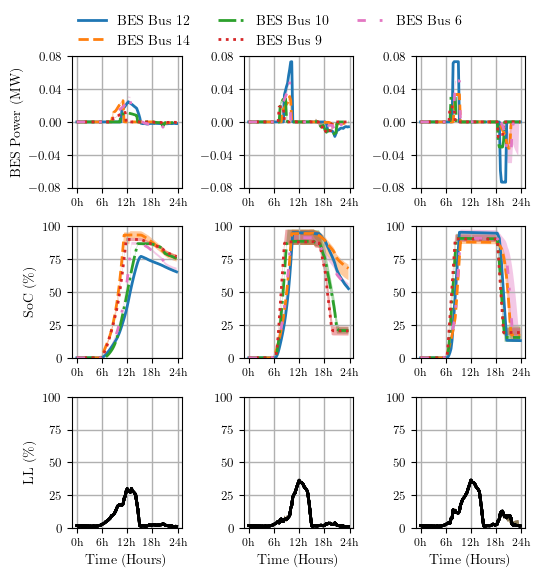

In [4]:
fig, axes = plt.subplots(len(data_sets), len(desired_order_list), figsize=(fig_width, fig_height))

# Add a list to collect handles and labels for the average lines
handles = []
# Loop through each dataset (rows)
for i, data_set in enumerate(data_sets):
    # Loop through each category (columns)
    for j, category in enumerate(desired_order_list):
        simulations = extracted_data.get(category, [])
        number_of_simulations = len(simulations)
        
        if number_of_simulations == 0:
            print(f"No simulations found for category: {category}")
            continue

        # Collect all tables into a list for stacking
        all_tables = [simulations[k]["simulation"][data_set] for k in range(number_of_simulations)]

        # Stack tables into a 3D NumPy array: (simulations, rows, columns)
        stacked_tables = np.stack([table.to_numpy() for table in all_tables])

        # Calculate average, 1st percentile, and 99th percentile
        avg_table = np.mean(stacked_tables, axis=0)
        quantile1_table = np.percentile(stacked_tables, 1, axis=0)
        quantile99_table = np.percentile(stacked_tables, 99, axis=0)

        # Convert NumPy arrays back to DataFrames
        avg_table_df = pd.DataFrame(avg_table, columns=all_tables[0].columns)
        quantile1_table_df = pd.DataFrame(quantile1_table, columns=all_tables[0].columns)
        quantile99_table_df = pd.DataFrame(quantile99_table, columns=all_tables[0].columns)

        # Plot data for each column in the current dataset
        x = range(len(avg_table_df))  # Assuming rows represent sequential time steps

        if i == len(data_sets) - 1:  # Last row
            # Combine all columns in a single subplot
            for idx, column in enumerate(avg_table_df.columns):
                y_avg = avg_table_df.mean(axis=1)
                y_quantile1 = quantile1_table_df.mean(axis=1)
                y_quantile99 = quantile99_table_df.mean(axis=1)
                
                # Plot average line
                line, = axes[i, j].plot(x, y_avg, color="black", linewidth=2)
                if j == 0 and idx == 0:  # Add a single handle for this category
                    handles.append(line)
                # Plot shaded quantile area
                axes[i, j].fill_between(x, y_quantile1, y_quantile99, alpha=0.2)
        else:  # All other rows
            for idx, column in enumerate(avg_table_df.columns):
                label = folder_labels[idx] if idx < len(folder_labels) else f"Column {idx}"
                y_avg = avg_table_df[column]
                y_quantile1 = quantile1_table_df[column]
                y_quantile99 = quantile99_table_df[column]

                # Plot average line
                line, = axes[i, j].plot(x, y_avg, label=label, linestyle=line_styles[idx % len(line_styles)], linewidth=2)
                if i == 0 and j == 0:  # Collect only one handle per label for the legend
                    handles.append(line)

                # Plot shaded quantile area
                axes[i, j].fill_between(x, y_quantile1, y_quantile99, alpha=0.4)

        # Set specific ylim for the first row
        if i == 0:  # First row
            axes[i, j].set_ylim(-0.08, 0.08)
        else:  # All other rows
            axes[i, j].set_ylim(0, 100.1)

        # Customize subplot
        if i == len(data_sets) - 1:
            axes[i, j].set_xlabel("Time (Hours)", fontsize=10)
        if j == 0:
            axes[i, j].set_ylabel(f"{y_label_names[i]}", fontsize=10)
        else:
            # Remove Y-axis ticks for all other columns
            axes[i, j].set_yticks([])
        
        # Add x-ticks and labels
        ticks = [0, 6*4, 12*4, 18*4, 24*4]
        tick_labels = ["0h", "6h", "12h", "18h", "24h"]
        axes[i, j].set_xticks(ticks)
        axes[i, j].set_xticklabels(tick_labels, fontsize=8)
        # axes[i, j].grid()
        # Setze explizite Major-Ticks für jede Achse
        axes[i, j].set_xticks(ticks)
        axes[i, j].set_yticks(np.linspace(axes[i, j].get_ylim()[0], axes[i, j].get_ylim()[1], 5))  # Beispiel für Y-Ticks
        axes[i, j].grid(True, which='both', linestyle='-', linewidth=1.0)

# Add a common legend for the figure using only the average lines
fig.legend(handles, folder_labels, loc='upper center', bbox_to_anchor=(0.5, 1.01), ncol=3, fontsize=10, frameon=False)

# Adjust layout and save the plot
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(f"{save_folder_name}/fig08montecarlo.pgf", format="pgf", bbox_inches="tight")
plt.savefig(f"{save_folder_name}/fig08montecarlo.pdf", format="pdf", dpi=300, bbox_inches="tight")

# Display the plot
plt.show()

In [5]:
print("Jupyter Notebook exploration complete. Thank you for your commitment to advancing sustainable energy solutions.")

Jupyter Notebook exploration complete. Thank you for your commitment to advancing sustainable energy solutions.
